# Fourier transform on .wav files- signal decomposition, time and frequency domains

In this notebook, I'll begin to explore the Fourier transform. The FT decomposes signals into the frequencies that make it up. If we want to transition from the frequency to the time domain we need the inverse Fourier transform (IFT).   

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from numpy.fft import fft

from config import data_dir

In [55]:
rate, data = wavfile.read('/home/stacy/pysandbox/data/M1F1-int16-AFsp.wav') # load the data


/home/stacy/anaconda3/envs/mypyenv/lib/python3.4/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [56]:
def show_info(array_name, array):
    print("Array", array_name)
    print("shape:", array.shape)
    print("dtype:", array.dtype)
    print("min, max:", array.min(), array.max())
    print()


show_info("data", data)

Array data
shape: (23493, 2)
dtype: int16
min, max: -7125 14325



In [57]:
# Take sine of each element in `data`
# The np.sin function is vectorized, so we don't need a for loop
sin_data = np.sin(data)

show_info("sin_data", sin_data)

# Scale up the values to 16 bit integer range and round 
scaled = np.round(32767 * sin_data)

show_info("scaled", scaled)

Array sin_data
shape: (23493, 2)
dtype: float32
min, max: -0.999992 0.999991

Array scaled
shape: (23493, 2)
dtype: float32
min, max: -32767.0 32767.0



In [58]:
# Cast `scaled` to an array with a 16 bit signed integer data type.
new_data = scaled.astype(np.int16)

show_info("new_data", new_data)

# Write the data to 'newname.wav'
wavfile.write('new_name.wav', rate, new_data)

Array new_data
shape: (23493, 2)
dtype: int16
min, max: -32767 32767



/home/stacy/anaconda3/envs/mypyenv/lib/python3.4/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


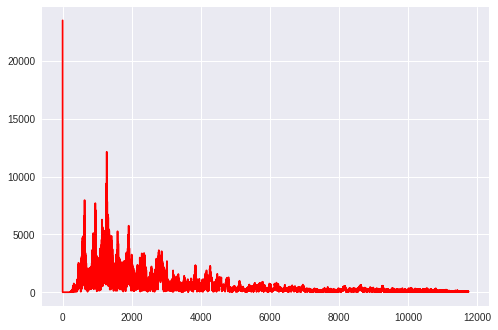

In [59]:
a = data.T[0] 
b = [(element / 2 ** 8) * 2-1 for element in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c) / 2  # only need half of the fft list
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()